In [39]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
housing_df = pd.read_excel('House Prices.xlsx')

In [15]:
# drop 'No' column
housing_df = housing_df.drop('No', axis=1)
housing_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


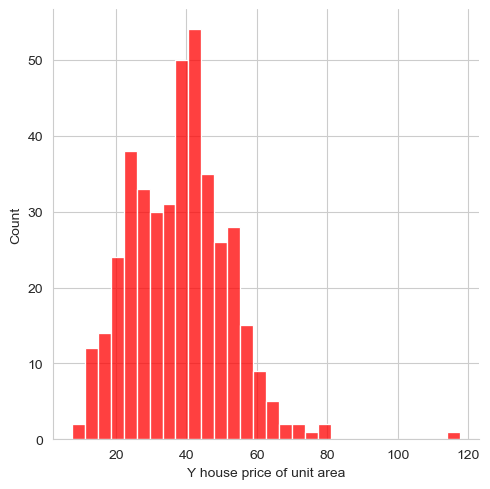

In [65]:
# view distribution of housing price values
sns.set_style('whitegrid')
sns.displot(housing_df['Y house price of unit area'], kde = False, color ='red', bins = 30)

In [16]:
# Split the data into features and labels and create a train test split of 80:20
column_names = housing_df.columns
X = housing_df[column_names[:-1]]
y = housing_df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Initialize and fit model
X_train_with_constant = sm.add_constant(X_train)
mls_reg = sm.OLS(y_train, X_train_with_constant)
mls_res = mls_reg.fit()

In [18]:
# Get summary of model
print(mls_res.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.565
Model:                                    OLS   Adj. R-squared:                  0.557
Method:                         Least Squares   F-statistic:                     70.08
Date:                        Tue, 07 May 2024   Prob (F-statistic):           1.26e-55
Time:                                08:55:10   Log-Likelihood:                -1198.1
No. Observations:                         331   AIC:                             2410.
Df Residuals:                             324   BIC:                             2437.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [19]:
# get latex syntax for implementation of table
print(mls_res.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                         & Y house price of unit area & \textbf{  R-squared:         } &     0.565   \\
\textbf{Model:}                                 &            OLS             & \textbf{  Adj. R-squared:    } &     0.557   \\
\textbf{Method:}                                &       Least Squares        & \textbf{  F-statistic:       } &     70.08   \\
\textbf{Date:}                                  &      Tue, 07 May 2024      & \textbf{  Prob (F-statistic):} &  1.26e-55   \\
\textbf{Time:}                                  &          08:55:15          & \textbf{  Log-Likelihood:    } &   -1198.1   \\
\textbf{No. Observations:}                      &              331           & \textbf{  AIC:               } &     2410.   \\
\textbf{Df Residuals:}                          &              324           & \textbf{  BIC:               } &     2437.   \\
\textbf{Df Model:}                              &                

In [20]:
# Get predictions and metrics (root mean squared error and R^2)
X_test_with_constant = sm.add_constant(X_test)
y_pred_train = mls_res.predict(X_train_with_constant)
y_pred_test = mls_res.predict(X_test_with_constant)
trainig_rmse = root_mean_squared_error(y_train, y_pred_train)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'training rmse: {trainig_rmse}' )
print(f'test rmse: {test_rmse}' )
print(f'test r2: {test_r2}' )

training rmse: 9.03189434586177
test rmse: 7.715078438942435
test r2: 0.6573242742217482


In [33]:
# create dataframe of x_test, y_test, y_predicted and residual for further analysis
df_results = X_test
df_results['y_true'] = y_test
df_results['y_pred'] = y_pred_test
residual_abs = [abs(i-j) for (i,j) in list(zip(y_test, y_pred_test))]
df_results['Absolute Residual'] = residual_abs
df_results

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,y_true,y_pred,Absolute Residual
356,2012.833,10.3,211.4473,1,24.97417,121.52999,45.3,40.095480,5.204520
170,2013.333,24.0,4527.6870,0,24.94741,121.49628,14.4,12.838192,1.561808
224,2013.333,34.5,324.9419,6,24.97814,121.54170,46.0,42.009669,3.990331
331,2013.333,25.6,4519.6900,0,24.94826,121.49587,15.6,12.647330,2.952670
306,2013.500,14.4,169.9803,1,24.97369,121.52979,50.2,42.443438,7.756562
...,...,...,...,...,...,...,...,...,...
308,2013.417,16.4,289.3248,5,24.98203,121.54348,53.0,47.125512,5.874488
100,2013.500,17.5,964.7496,4,24.98872,121.53411,38.2,44.717746,6.517746
7,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7,46.844693,0.144693
22,2012.917,14.7,1360.1390,1,24.95204,121.54842,24.6,29.116762,4.516762


In [30]:
# look at 10 smallest house price values
y_test_small_value = sorted(y_test)[:10]
y_test_small_value

[12.9, 13.2, 14.4, 15.0, 15.6, 16.7, 19.1, 19.2, 20.8, 20.9]

In [38]:
# look at 10 largest house price values
y_test_large_value = sorted(y_test, reverse=True)[:10]
y_test_large_value

[78.3, 63.9, 62.1, 60.7, 57.4, 56.2, 55.2, 54.4, 53.7, 53.5]

In [46]:
# smallest residuals
smallest_residuals_df = df_results.sort_values(by=['Absolute Residual']).head(10)
smallest_residuals_df = smallest_residuals_df[['y_true', 'y_pred', 'Absolute Residual']]
smallest_residuals_df

,y_true,y_pred,Absolute Residual
384,12.9,12.998392,0.098392
7,46.7,46.844693,0.144693
253,25.9,26.207497,0.307497
264,40.6,40.084173,0.515827
65,44.3,43.626594,0.673406
145,45.5,46.188724,0.688724
198,39.1,40.049555,0.949555
5,32.1,31.136257,0.963743
298,16.7,15.375679,1.324321
76,36.8,38.139959,1.339959


In [45]:
# largest residuals
largest_residuals_df = df_results.sort_values(by=['Absolute Residual'], ascending=False).head(10)
largest_residuals_df = largest_residuals_df[['y_true', 'y_pred', 'Absolute Residual']]
largest_residuals_df

,y_true,y_pred,Absolute Residual
220,78.3,44.938078,33.361922
271,26.5,43.980184,17.480184
334,22.8,39.676226,16.876226
199,31.6,46.358804,14.758804
164,55.2,41.125404,14.074596
326,62.1,48.501798,13.598202
60,21.3,33.991556,12.691556
15,50.5,38.373796,12.126204
355,60.7,48.911612,11.788388
402,28.5,39.506762,11.006762


In [60]:
# concatenate dfs
df_concat = pd.concat([largest_residuals_df, smallest_residuals_df.set_index(largest_residuals_df.index)], axis=1)
df_concat

,y_true,y_pred,Absolute Residual,y_true,y_pred,Absolute Residual
220,78.3,44.938078,33.361922,12.9,12.998392,0.098392
271,26.5,43.980184,17.480184,46.7,46.844693,0.144693
334,22.8,39.676226,16.876226,25.9,26.207497,0.307497
199,31.6,46.358804,14.758804,40.6,40.084173,0.515827
164,55.2,41.125404,14.074596,44.3,43.626594,0.673406
326,62.1,48.501798,13.598202,45.5,46.188724,0.688724
60,21.3,33.991556,12.691556,39.1,40.049555,0.949555
15,50.5,38.373796,12.126204,32.1,31.136257,0.963743
355,60.7,48.911612,11.788388,16.7,15.375679,1.324321
402,28.5,39.506762,11.006762,36.8,38.139959,1.339959


In [59]:
# get latex code
print(df_concat.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  y\_true &     y\_pred &  Absolute Residual &  y\_true &     y\_pred &  Absolute Residual \\
\midrule
220 &    78.3 &  44.938078 &          33.361922 &    12.9 &  12.998392 &           0.098392 \\
271 &    26.5 &  43.980184 &          17.480184 &    46.7 &  46.844693 &           0.144693 \\
334 &    22.8 &  39.676226 &          16.876226 &    25.9 &  26.207497 &           0.307497 \\
199 &    31.6 &  46.358804 &          14.758804 &    40.6 &  40.084173 &           0.515827 \\
164 &    55.2 &  41.125404 &          14.074596 &    44.3 &  43.626594 &           0.673406 \\
326 &    62.1 &  48.501798 &          13.598202 &    45.5 &  46.188724 &           0.688724 \\
60  &    21.3 &  33.991556 &          12.691556 &    39.1 &  40.049555 &           0.949555 \\
15  &    50.5 &  38.373796 &          12.126204 &    32.1 &  31.136257 &           0.963743 \\
355 &    60.7 &  48.911612 &          11.788388 &    16.7 &  15.375679 &           1.324321 \\
402 

C:\Users\Armand\AppData\Local\Temp\ipykernel_11912\2858998493.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_concat.to_latex())
